In [118]:
from scipy.io import arff
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import time

In [3]:
data1 = arff.loadarff(open('datasets/artificial/R15.arff','r'))
data2 = arff.loadarff(open('datasets/artificial/diamond9.arff','r'))
data3 = arff.loadarff(open('datasets/artificial/spherical_4_3.arff','r')) 

#Datasets for agglomerative clustering
data4 = arff.loadarff(open('datasets/artificial/zelnik3.arff','r'))
data5 = arff.loadarff(open('datasets/artificial/complex9.arff','r')) 
data6 = arff.loadarff(open('datasets/artificial/banana.arff','r'))

#Datasets for DBSCAN
data7 = arff.loadarff(open('datasets/artificial/zelnik2.arff','r'))
data8 = arff.loadarff(open('datasets/artificial/zelnik4.arff','r'))
data9 = arff.loadarff(open('datasets/artificial/cure-t2-4k.arff','r'))

#Comparison between HDB and DBSCAN
data10 = arff.loadarff(open('datasets/artificial/st900.arff','r'))
data11 = arff.loadarff(open('datasets/artificial/2sp2glob.arff','r'))
data12 = arff.loadarff(open('datasets/artificial/donut3.arff','r'))


In [132]:
#Definition des fonctions

def init_df_cluster(df):
    return df[df.columns[0]], df[df.columns[1]]

def Kmeans(dataset, max_clusters = 20):
    
    df = pd.DataFrame(dataset[0])
    
    list_X, list_scores = [], []
    for i in range(2,max_clusters):
        kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
        list_X.append(kmeans)
        list_scores.append(sklearn.metrics.silhouette_score(df, kmeans.labels_))
    max_value = max(list_scores)
    return list_X[list_scores.index(max_value)]

def Kmeans_inertia(dataset, max_clusters = 20, pourcentage = 0.05):
    list_X, list_scores = [], []
    
    for i in range(1,max_clusters):
        kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
        list_X.append(kmeans)
        list_scores.append(kmeans.inertia_)

    best_cluster_number = len(Y2)

    for i in range(1, len(Y2)):
        ecart = Y2[i - 1] - Y2[i]  
        #print(f"i = {i}, Y2-1 = {Y2[i - 1]}, Y2 = {Y2[i]}")
        if (ecart < Y2[i - 1] * pourcentage):
            break
    return (list_X[i-1])
        
#print(Kmeans(data1))

def agglomerative(dataset, max_clusters = 20, show_time = False):
    
    time_list = []  
    df = pd.DataFrame(dataset[0])
    list_X, list_scores = [], []
    
    for i in range(2,max_clusters):
        timer = time.time()
        clusters = AgglomerativeClustering(n_clusters=i).fit(df)
        list_X.append(clusters)
        list_scores.append(sklearn.metrics.silhouette_score(df,clusters.labels_))
        max_value = max(list_scores)       
        time_list.append(time.time() - timer)
               
    if(show_time):
        plt.plot(np.linspace(1,max_clusters - 2,max_clusters - 2), time_list)
    return list_X[list_scores.index(max_value)]

def plot_agglomerative(dataset):
    df = pd.DataFrame(dataset[0])
    nom = Kmeans(dataset)
    X, Y = init_df_cluster(df)
    plt.scatter(X, Y, c = nom.labels_)
    plt.scatter(nom.cluster_centers_[:,0], nom.cluster_centers_[:,1], c='r', label = 'centers')
    plt.legend()

#print(agglomerative(data4))
    
def plot_clusters_kmeans(dataset):
    df = pd.DataFrame(dataset[0])
    nom = Kmeans(dataset)
    X, Y = init_df_cluster(df)
    plt.scatter(X, Y, c = nom.labels_)
    plt.scatter(nom.cluster_centers_[:,0], nom.cluster_centers_[:,1], c='r', label = 'centers')
    plt.legend()
    


#VERSION MISTERY

def plot_clusters_kmeans3D(dataset):
    df = pd.DataFrame(dataset[0])
    clusters = Kmeans(dataset)
    X, Y = init_df_cluster(df)
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.scatter(dataset[0]["X"], dataset[0]["Y"], dataset[0]["Z"], c = clusters.labels_ )
    #plt.scatter(nom.cluster_centers_[:,0], nom.cluster_centers_[:,1], nom.cluster_centers_[:,2], c='r', label = 'centers')
    #plt.scatter(X, Y, c = nom.labels_)
    #plt.scatter(nom.cluster_centers_[:,0], nom.cluster_centers_[:,1], c='r', label = 'centers')
    #plt.legend()
    plt.show()
    
def plot_dbscan(dataset, eps_param, min_samples_param):
    df = pd.DataFrame(dataset[0])
    clusters = DBSCAN_result = DBSCAN(eps = eps_param, min_samples = min_samples_param).fit(df)
    X, Y = df[df.columns[0]], df[df.columns[1]]
    plt.scatter(X,Y, c = DBSCAN_result.labels_)
    

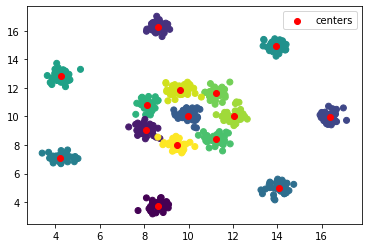

In [5]:
plot_clusters_kmeans(data1)

C:\Users\xSyl0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


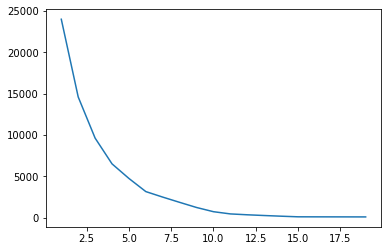

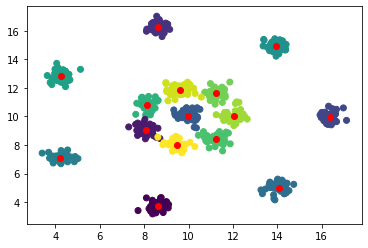

In [6]:
data = data1
df = pd.DataFrame(data[0])
X, Y = df['x'], df['y']
#print(df)

X2, Y2 = [], []
liste = []

j = 20

for i in range(1,j):
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
    
    X2.append(i)
    Y2.append(kmeans.inertia_)
    liste.append(kmeans)
    
pourcentage = 0.05
best_cluster_number = len(Y2)

for i in range(1, len(Y2)):
    
    ecart = Y2[i - 1] - Y2[i]  
    #print(f"i = {i}, Y2-1 = {Y2[i - 1]}, Y2 = {Y2[i]}")
    if (ecart < Y2[i - 1] * pourcentage):
        #print(f"Le meilleur nombre de cluster est {i}")
        best_cluster_number = i
        break
        

plt.figure()
plt.plot(X2, Y2)

kmeans = KMeans(n_clusters = best_cluster_number, random_state=0).fit(df)
plt.figure()
plt.scatter(X, Y, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

In [115]:
time_tab = []

time_start = time.time()
n = 20

for i in range(1,n):
    time_start = time.time()
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df)
    X1.append(i)
    Y1.append(kmeans.inertia_)
    time_end = time.time()
    time_exec = time_end - time_start
    time_tab.append(time_exec)
    
print(time_tab)
    
    
X = np.linspace(1,n - 1,n - 1)
plt.figure()
plt.plot(X, time_tab)

C:\Users\xSyl0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


NameError: name 'X1' is not defined

Le nombre de cluster optimal est 3
0.9187192243245286


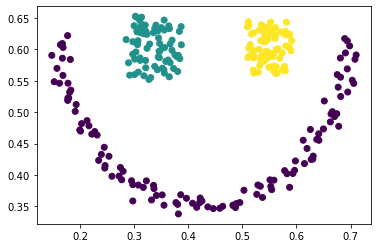

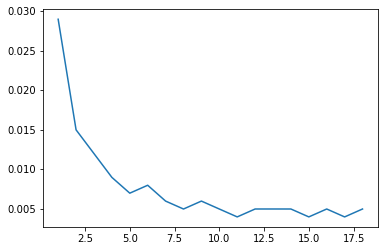

In [116]:
df = pd.DataFrame(data4[0])
X1, Y1 = [], []
X3, Y3 = df['x'], df['y']

list_clusters = []
time_tab = []

for i in range(2,n):
    time_start = time.time()
    clusters = AgglomerativeClustering(n_clusters=i).fit(df)
    list_clusters.append(clusters)
    score = sklearn.metrics.silhouette_score(df,clusters.labels_)
    X1.append(i)
    Y1.append(score)
    
    time_end = time.time()
    time_exec = time_end - time_start
    time_tab.append(time_exec)

best_score = max(Y1)
index_best_score = Y1.index(best_score)

print(f"Le nombre de cluster optimal est {index_best_score + 2}")
print(best_score)

plt.figure()
plt.scatter(X3, Y3, c = list_clusters[index_best_score].labels_)
plt.show()

X = np.linspace(1,n - 2,n - 2)
plt.figure()
plt.plot(X, time_tab)

In [ ]:
# DBSCAN
X4, Y4 = df[df.columns[0]], df[df.columns[1]]

df = pd.DataFrame(data12[0])

df["class"] = df["class"].replace(b'noise', b'10')

DBSCAN_result = DBSCAN(eps = 1, min_samples = 10).fit(df)
plt.scatter(X4,Y4, c = DBSCAN_result.labels_)

In [ ]:
X4, Y4 = df['x'], df['y']
for i in range(0, 5, 0.1):
    for j in range(21):
        #blabla y'aura des trucs ici
    

In [ ]:
import hdbscan
df = pd.DataFrame(data12[0])
X5, Y5 = df[df.columns[0]], df[df.columns[1]]

df["class"] = df["class"].replace(b'noise', b'10')

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
clusterer_labels = clusterer.fit_predict(df)

plt.figure()
plt.scatter(X5, Y5, c = clusterer_labels)
plt.figure()
plt.scatter(X4, Y4, c = DBSCAN_result.labels_)

In [ ]:
#Dataset du monde réel
data_real1 = arff.loadarff(open('datasets/real-world/iris.arff','r'))
data_real2 = arff.loadarff(open('datasets/real-world/balance-scale.arff','r'))

In [121]:
colnames = ['X', 'Y', 'Z']

datam1 = [pd.read_csv('mistery_dataset/a.data', names=colnames, sep="\t")]
datam2 = [pd.read_csv('mistery_dataset/h.data', names=colnames, sep="\t")]
datam3 = [pd.read_csv('mistery_dataset/t.data', names=colnames, sep="\t")]
datam4 = [pd.read_csv('mistery_dataset/tr.data', names=['X', 'Y'], sep=" ")]
datam5 = [pd.read_csv('mistery_dataset/zgn.data', names=['X', 'Y'], sep=" ")]
datam6 = [pd.read_csv('mistery_dataset/zgo.data', names=['X', 'Y'], sep=" ")]

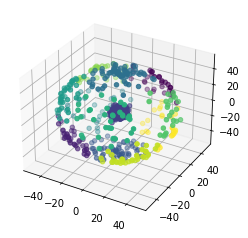

In [145]:
#plot_agglomerative(datam1)
plot_clusters_kmeans3D(datam1)
#plot_dbscan(datam5, 0.1, 10)

DATAM1 : Kmeans

DATAM2 : Kmeans

DATAM3 : Kmeans

DATAM4 : Agglomerative